In [188]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import tqdm
import math
import matplotlib as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
# Change path to dir where utils folder is located
import sys
sys.path.insert(0,'/Users/harrisonchase/workplace/sports/clean_sports_work/nfl_big_data_bowl/')

from utils import *

In [190]:
# Change path to where Data is located
data_folder = '/Users/harrisonchase/workplace/sports/Big-Data-Bowl/Data'

In [191]:
games_df = pd.read_csv(data_folder + '/games.csv')
players_df = pd.read_csv(data_folder + '/players.csv')
plays_df = pd.read_csv(data_folder + '/plays.csv')
plays_df = plays_df[~plays_df['isSTPlay']]

In [192]:
player_pos_dict = players_df.set_index('nflId')['PositionAbbr'].to_dict()

In [193]:
home_away_dict = games_df.set_index('gameId').rename(columns={'homeTeamAbbr': 'home', 'visitorTeamAbbr': 'away'})[['home', 'away']].to_dict()

In [194]:
passes_df = plays_df[plays_df['PassResult'].notnull()]

In [195]:
all_routes_list = []
for g_id in tqdm.tqdm(passes_df['gameId'].unique()):
    all_routes_list.append(get_routes_for_game(g_id, passes_df, plays_df, home_away_dict, player_pos_dict, data_folder))


  0%|          | 0/91 [00:00<?, ?it/s]/Users/harrisonchase/workplace/sports/clean_sports_work/nfl_big_data_bowl/utils.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ]
100%|██████████| 91/91 [01:51<00:00,  1.48s/it]


In [8]:
all_routes_df = pd.concat(all_routes_list)

In [180]:
route_df = get_route_df(all_routes_df)

/Users/harrisonchase/workplace/sports/clean_sports_work/nfl_big_data_bowl/utils.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [181]:
route_df1 = route_df.copy()

In [182]:
route_df1 = assign_direction(route_df1)

/Users/harrisonchase/workplace/.venvs/record_linking/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [184]:
route_df1.reset_index().to_msgpack('feature_df.mp')

## Can just start here if you want to load data

In [186]:
np_array = load_df_to_np_matrix('feature_df.mp')

In [187]:
np_array.shape

(13, 80, 24112)

## Below this is not clean!!!!!

In [105]:
max_len = 80
df = pd.read_msgpack('feature_df.mp')
#df = df.merge(df.groupby(index_cols)['frame.id'].max().to_frame('max_frame').reset_index())

In [168]:
np_array = res.values

In [140]:
_, df1 = gs[4]

In [177]:
var = list(np_array)

In [178]:
var1 = np.concatenate([np.expand_dims(arr, axis=-1) for arr in var], axis=-1)

In [179]:
var1.shape

(15, 80, 24112)

In [119]:
pd.DataFrame(0, columns=['a'], index=range(1))

,a
0,0


In [132]:
df1.index[:1]

Int64Index([13380], dtype='int64')

In [142]:
missing_n = max_len - df1.shape[0]
index = [df1.index[0] for _ in range(missing_n)]
df1 = pd.concat([
    pd.DataFrame(0, columns=df1.columns, index=index),
    df1
])

In [143]:
df1

,gameId,playId,nflId,start_x,start_y,delta_x,delta_y,frame.id,cat_dir
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0
13490,0,0,0.0,0.00,0.00,0.00,0.00,0,0


In [122]:
df1

,gameId,playId,nflId,start_x,start_y,delta_x,delta_y,frame.id,cat_dir
0,0,0,0.0,0.00,0.00,0.00,0.00,0,0
1,0,0,0.0,0.00,0.00,0.00,0.00,0,0
2,0,0,0.0,0.00,0.00,0.00,0.00,0,0
3,0,0,0.0,0.00,0.00,0.00,0.00,0,0
4,0,0,0.0,0.00,0.00,0.00,0.00,0,0
5,0,0,0.0,0.00,0.00,0.00,0.00,0,0
6,0,0,0.0,0.00,0.00,0.00,0.00,0,0
7,0,0,0.0,0.00,0.00,0.00,0.00,0,0
8,0,0,0.0,0.00,0.00,0.00,0.00,0,0
9,0,0,0.0,0.00,0.00,0.00,0.00,0,0


In [28]:
from sklearn.cluster import KMeans

In [29]:
def ngrams(input_, n):
    input_ = input_.split(' ')
    output = {}
    for i in range(len(input_)-n+1):
        g = ' '.join(input_[i:i+n])
        output.setdefault(g, 0)
        output[g] += 1
    return output

In [30]:
def make_seq(df):
    d1 = ngrams(' '.join(str(s) for s in ['S'] + df['pred'].tolist() + ['E']), 1)
    d2 = ngrams(' '.join(str(s) for s in ['S'] + df['pred'].tolist() + ['E']), 2)
    d3 =ngrams(' '.join(str(s) for s in ['S'] + df['pred'].tolist() + ['E']), 3)
    return pd.Series({**d1, **d2, **d3})

In [31]:
def make_seq1(df):
    return ' '.join(str(s) for s in ['S'] + df['pred'].tolist() + ['E'])

In [32]:
seq_df1 = route_df1.groupby(['gameId', 'playId', 'nflId']).apply(make_seq1)

In [33]:
seq_df2 = seq_df1.to_frame('seq').join(route_df1.groupby(['gameId', 'playId', 'nflId']).nth(0))

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [35]:
tfidf = TfidfVectorizer(ngram_range=(1, 5), token_pattern='(?u)\\b\\w+\\b')
trans = tfidf.fit_transform(seq_df2['seq'].values)

In [36]:
tf_df = pd.DataFrame(trans.toarray(), columns = tfidf.vocabulary)

In [417]:
feat_df = tf_df.join(seq_df2.reset_index()[['start_x', 'start_y']] / {'start_x': 2, 'start_y': 20})

In [381]:
(seq_df2.reset_index()[['start_x', 'start_y']] / {'start_x': 5, 'start_y': 30}).var()

start_x    0.128719
start_y    0.139646
dtype: float64

In [136]:
res = []
for i in range(1, 35):
    km1 = KMeans(n_clusters=i)
    km1.fit_predict(feat_df)
    res.append(km1.inertia_)
    print(i, km1.inertia_)

1 2942405.3744797483
2 881463.9154256843
3 483018.48542012606
4 303743.2470877951
5 191211.4963514152
6 148342.08929092897
7 107359.55968163072
8 90049.97549211237
9 77632.63627620306
10 65706.66862123617
11 58384.317050497375
12 52739.53009417043
13 47421.1491993944
14 44934.44196958047
15 42518.02724557926
16 40636.80010052096
17 38774.75957350304
18 37634.11709028338
19 36496.24918873074
20 35665.30366410925
21 34891.8531989656
22 34102.84437638831
23 33461.60525557554
24 32800.4215110702
25 32437.684437745484


KeyboardInterrupt: 

In [305]:
res = []
for i in range(1, 15):
    km1 = KMeans(n_clusters=i)
    km1.fit_predict(tf_df)
    res.append(km1.inertia_)
    print(i, km1.inertia_)

1 18089.42927305532
2 15190.237187392391
3 12704.814952225046
4 11441.949608858744
5 10365.96522586726
6 9657.398124414482
7 9293.8721063492
8 8998.67239416518
9 8765.562986767576
10 8573.33804382421
11 8412.957197820535
12 8268.902653078749
13 8147.275481592698
14 8015.690508071193


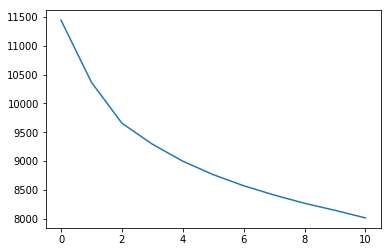

In [307]:
pd.Series(res[3:]).plot()

7471.922488102584

In [254]:
km1 = KMeans(n_clusters=8)
preds = km1.fit_predict(tf_df)

In [255]:
preds_df = pd.Series(preds, index=seq_df1.index, name='pred')
preds_df = preds_df.to_frame().join(all_routes_df.groupby(['gameId', 'playId', 'nflId'])['mod_y'].nth(0).to_frame(
'mod_y')).reset_index()

In [256]:
preds_df['area'] = 'C'
preds_df.loc[preds_df['mod_y'] > 2, 'area'] = 'R'
preds_df.loc[preds_df['mod_y'] < -2, 'area'] = 'L'
preds_df['pred_area'] = preds_df['pred'].astype(str) + '_' + preds_df['area']

In [53]:
players_df[(players_df['LastName'] == 'Cooper')]

,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College
232,2552487,Amari,Cooper,WR,2015,1.0,4.0,"6'01""",211,Alabama
372,2552611,Xavier,Cooper,DT,2015,3.0,96.0,"6'04""",300,Washington State
814,2539272,Jonathan,Cooper,G,2013,1.0,7.0,"6'02""",302,North Carolina
926,2541202,Marcus,Cooper,CB,2013,7.0,252.0,"6'02""",197,Rutgers
1256,2555419,Pharoh,Cooper,WR,2016,4.0,117.0,"5'11""",207,South Carolina


In [257]:
preds_df['pred'].value_counts()

1    4254
0    4159
2    3432
4    2785
3    2557
6    2389
5    2335
7    2201
Name: pred, dtype: int64

In [258]:
finished_tracking = all_routes_df.merge(preds_df[['gameId', 'playId', 'nflId', 'pred']])

In [259]:
def plot_routes(num):
    sub_routes_df = finished_tracking[finished_tracking['pred'] ==num]
    gs = sub_routes_df.groupby(['nflId', 'playId'])
    for g, d_ in list(gs)[:500]:
        d_.set_index('mod_y')['mod_x'].plot(xlim=[-25, 25], ylim=[-10, 35])
    

In [614]:
sub_routes_df = finished_tracking[finished_tracking['pred'] ==2]
sub_routes_df.shape

(49441, 29)

In [615]:
gs = sub_routes_df.groupby(['nflId', 'playId'])

In [628]:
game_id = 2017091011
tracking_df = pd.read_csv('Data/tracking_gameId_{}.csv'.format(game_id)).dropna(subset=['x'])
game_passes_df = passes_df[passes_df['gameId'] == game_id]
game_plays_df = plays_df[(plays_df['gameId'] == game_id) & 
                         plays_df['playId'].isin(tracking_df[tracking_df['displayName'] == 'football']['playId'])]
sub_home_away_dict = {'home': home_away_dict['home'][game_id],
                  'away': home_away_dict['away'][game_id]}
tracking_df['teamAbbr'] = tracking_df['team'].apply(sub_home_away_dict.get)

tracking_df['playerPos'] = tracking_df['nflId'].apply(player_pos_dict.get)
dict_of_sides = get_dict_of_sides(tracking_df, game_plays_df)
game_passes_df['mult'] = [dict_of_sides[p] for p in zip(game_passes_df['quarter'], game_passes_df['possessionTeam'])]
tracking_df = tracking_df.merge(game_passes_df[['playId', 'mult', 'possessionTeam']], how='inner', on='playId')
ball_snap = tracking_df[tracking_df['event'] == 'ball_snap'].groupby('playId')['frame.id'].first().to_frame('ball_snap').reset_index()
end_events = {'pass_arrived'}
#end_events = {'pass_forward'}
pass_arrived = tracking_df[tracking_df['event'].isin(end_events)].groupby('playId')['frame.id'].first().to_frame('end_events').reset_index()

merged_tracking = tracking_df.merge(ball_snap).merge(pass_arrived)

ball_info = merged_tracking[
    ((merged_tracking['playerPos'] == 'C') |
     (merged_tracking['displayName'] == 'football')
    )&
    (merged_tracking['ball_snap'] == merged_tracking['frame.id'])
].dropna(subset=['x', 'y']).sort_values('dir')

/Users/harrisonchase/workplace/.venvs/record_linking/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [618]:
sub_routes_df.iloc[0]

gameId                      2017091011
playId                            1302
nflId                              949
time              2017-09-10T21:21:42Z
x                                62.88
y                                23.64
s                                 0.81
dis                                  0
dir                             272.86
event                        ball_snap
displayName           Jonathan Stewart
jerseyNumber                        28
team                              away
frame.id                            15
teamAbbr                           CAR
playerPos                           RB
mult                                -1
possessionTeam                     CAR
ball_snap                           15
end_events                          77
ball_x                             NaN
ball_y                             NaN
mod_y                              NaN
mod_x                              NaN
mod_dir                         182.86
play_part                

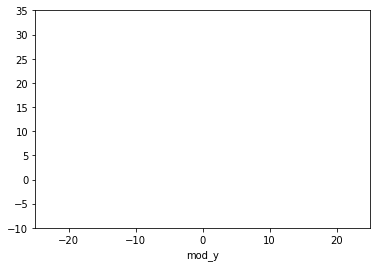

In [616]:
for g, d_ in gs:
    d_.set_index('mod_y')['mod_x'].plot(xlim=[-25, 25], ylim=[-10, 35])

In [65]:
players_df['one_abbrv'] = players_df['FirstName'].str[:1] + '.' + players_df['LastName']
players_df['two_abbrv'] = players_df['FirstName'].str[:2] + '.' + players_df['LastName']

In [66]:
def get_target(s):
    if 'intended for' in s:
        return s.split('intended for ')[1].split(' ')[0]
    try:
        return s.split('to ')[1].split(' ')[0]
    except:
        return np.nan
replace_dict = {
    'R.Burkhead': 'M.Burkhead',
    'T.Hilton': 'E.Hilton',
    'J.Witten': 'C.Witten',
    'Ju.Jones': 'Q.Jones',
    'Z.Jones': 'I.Jones',
    'C.Fleener': 'J.Fleener',
    'C.Godwin': 'R.Godwin',
    'T.Burton': 'L.Burton',
    'M.Tolbert': 'L.Tolbert',
    'T.Gentry': 'A.Gentry',
    'L.Smith': 'Jo.Smith',
    'A.Cross': 'W.Cross',
    'T.McBride': 'D.McBride',
    'M.Hazel': 'C.Hazel',
    
}
passes_df['target'] = passes_df['playDescription'].apply(get_target).str.rstrip('\.').replace(replace_dict)

/Users/harrisonchase/workplace/.venvs/record_linking/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
passes_df.iloc[0]

gameId                                                           2017091004
playId                                                                   73
quarter                                                                   1
GameClock                                                          14:54:00
down                                                                      1
yardsToGo                                                                10
possessionTeam                                                          ARI
yardlineSide                                                            ARI
yardlineNumber                                                           23
offenseFormation                                                    SHOTGUN
personnel.offense                                          1 RB, 1 TE, 3 WR
defendersInTheBox                                                         6
numberOfPassRushers                                                       4
personnel.de

In [68]:
passes_df['complete'] = passes_df['PassResult'] == 'C'
passes_df['yds_passs'] = passes_df['PlayResult']
passes_df.loc[~passes_df['complete'], 'yds_pass'] = 0

/Users/harrisonchase/workplace/.venvs/record_linking/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/harrisonchase/workplace/.venvs/record_linking/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/harrisonchase/workplace/.venvs/record_linking/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [69]:
players_df

,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College,one_abbrv,two_abbrv
0,79860,John,Stafford,QB,2009,1.0,1.0,"6'03""",220,Georgia,J.Stafford,Jo.Stafford
1,71465,Andre,Smith,T,2009,1.0,6.0,"6'04""",325,Alabama,A.Smith,An.Smith
2,80427,Darrius,Heyward-Bey,WR,2009,1.0,7.0,"6'02""",210,Maryland,D.Heyward-Bey,Da.Heyward-Bey
3,71269,Michael,Crabtree,WR,2009,1.0,10.0,"6'01""",214,Texas Tech,M.Crabtree,Mi.Crabtree
4,71423,Brian,Orakpo,OLB,2009,1.0,13.0,"6'04""",257,Texas,B.Orakpo,Br.Orakpo
5,79848,Malcolm,Jenkins,SS,2009,1.0,14.0,"6'00""",204,Ohio State,M.Jenkins,Ma.Jenkins
6,80421,Brian,Cushing,ILB,2009,1.0,15.0,"6'03""",255,Southern California,B.Cushing,Br.Cushing
7,71193,Robert,Ayers,DE,2009,1.0,18.0,"6'03""",275,Tennessee,R.Ayers,Ro.Ayers
8,80429,Jeremy,Maclin,WR,2009,1.0,19.0,"6'00""",198,Missouri,J.Maclin,Je.Maclin
9,71375,Alex,Mack,C,2009,1.0,21.0,"6'04""",311,California,A.Mack,Al.Mack


In [173]:
merged_preds = (
    preds_df
    .merge(players_df[['nflId', 'one_abbrv', 'two_abbrv', 'FirstName', 'LastName']], how='left')
    .merge(passes_df[['gameId', 'playId', 'target', 'playDescription', 'complete', 'yds_passs']], how='left')
)

In [174]:
merged_preds['is_target'] = (merged_preds['target'] == merged_preds['one_abbrv']) | (merged_preds['target'] == merged_preds['two_abbrv'])
merged_preds['own_complete'] = merged_preds['complete'] * merged_preds['is_target']
merged_preds['own_yds'] = merged_preds['yds_passs'] * merged_preds['is_target']


/Users/harrisonchase/workplace/.venvs/record_linking/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [475]:
merged_preds.iloc[0]

gameId                                                    2017090700
playId                                                            68
nflId                                                         497240
pred                                                               3
one_abbrv                                               R.Gronkowski
two_abbrv                                              Ro.Gronkowski
FirstName                                                     Robert
LastName                                                  Gronkowski
target                                                       D.Allen
playDescription    (14:55) NE 12-Brady 18th season as Patriots QB...
complete                                                       False
yds_passs                                                          0
is_target                                                      False
own_complete                                                   False
own_yds                           

In [277]:
players_df[players_df['LastName'] == 'Cooks']

,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College,one_abbrv,two_abbrv
978,2543498,Brandin,Cooks,WR,2014,1.0,20.0,"5'10""",189,Oregon State,B.Cooks,Br.Cooks


In [278]:
def get_table(nfl_id):
    sub_df = merged_preds[merged_preds['nflId'] == nfl_id]
    target_df = sub_df[sub_df['is_target']]
    return (
        sub_df.groupby('pred')['is_target'].mean().to_frame('targ_pct')
        .join(target_df.groupby('pred')['own_complete'].mean().to_frame('comp_pct'))
        .join(target_df.groupby('pred')['own_yds'].mean().to_frame('median_yds'))
        .join(sub_df.groupby('pred').size().to_frame('size'))
    )


In [280]:
nfl_id = 2543498
get_table(nfl_id).sort_values('size')

,targ_pct,comp_pct,median_yds,size
pred,,,,
7,1.000000,0.000000,0.000000,1
6,0.500000,0.000000,0.000000,2
12,0.500000,1.000000,-2.000000,2
4,0.200000,1.000000,19.000000,5
8,0.142857,0.000000,0.000000,7
10,0.375000,1.000000,11.666667,8
13,0.166667,0.500000,1.000000,12
1,0.071429,0.000000,0.000000,14
5,0.181818,0.750000,22.750000,22


In [274]:
nfl_id = 497240
get_table(nfl_id).sort_values('size')

,targ_pct,comp_pct,median_yds,size
pred,,,,
10,0.000000,NaN,NaN,1
9,0.000000,NaN,NaN,2
14,0.333333,0.000000,0.000000,3
0,0.250000,0.000000,0.000000,4
4,0.400000,1.000000,34.500000,5
11,0.222222,0.500000,1.000000,9
13,0.333333,0.666667,7.333333,9
7,0.400000,0.750000,13.500000,10
2,0.454545,0.800000,10.800000,11


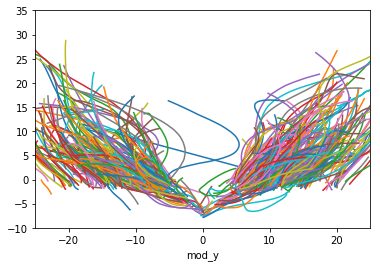

In [260]:
plot_routes(0)

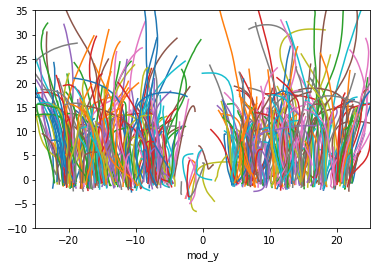

In [261]:
plot_routes(1)

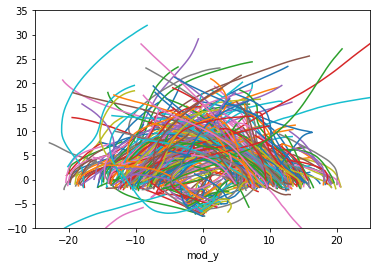

In [262]:
plot_routes(2)

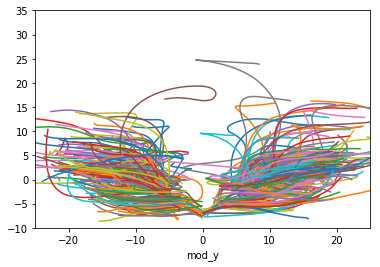

In [263]:
plot_routes(3)

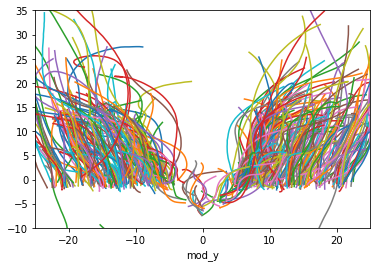

In [264]:
plot_routes(4)

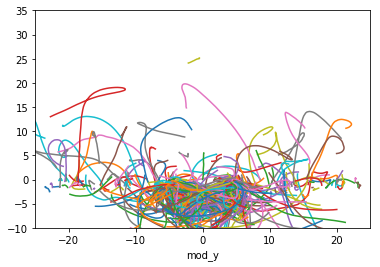

In [265]:
plot_routes(5)

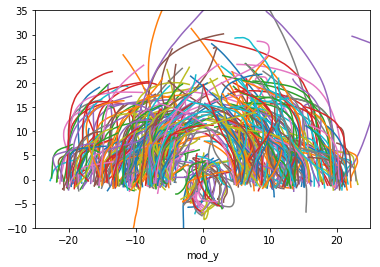

In [266]:
plot_routes(6)

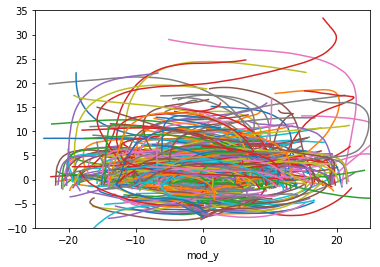

In [267]:
plot_routes(7)

In [268]:
plot_routes(8)

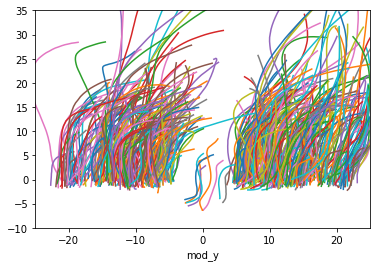

In [508]:
plot_routes(9)

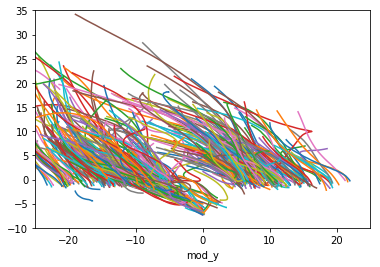

In [509]:
plot_routes(10)

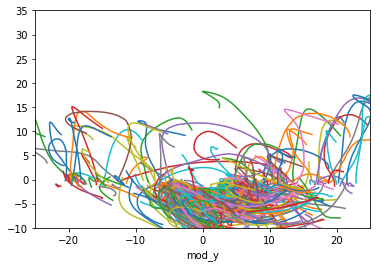

In [510]:
plot_routes(11)

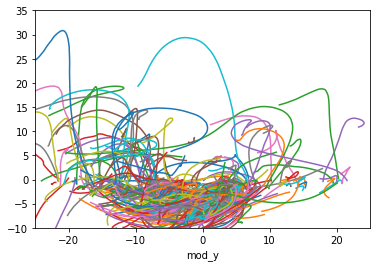

In [511]:
plot_routes(12)

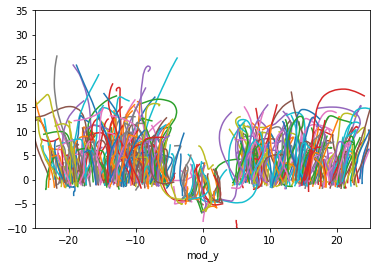

In [512]:
plot_routes(13)

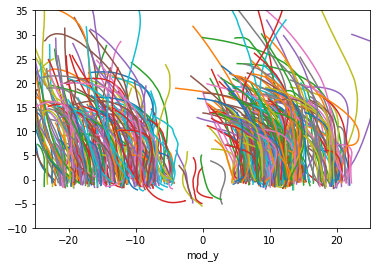

In [513]:
plot_routes(14)

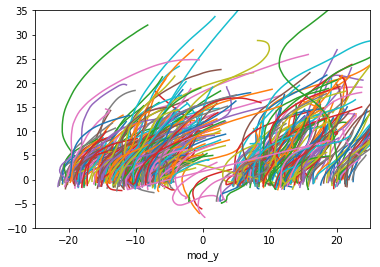

In [514]:
plot_routes(15)

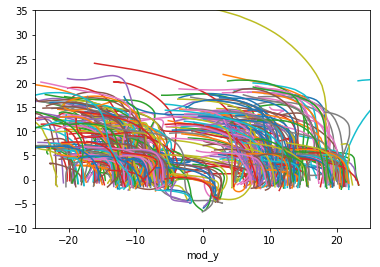

In [515]:
plot_routes(16)

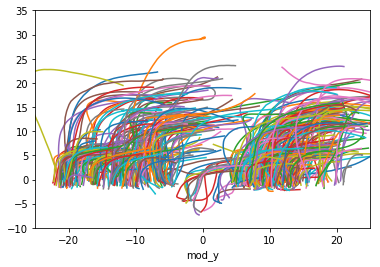

In [516]:
plot_routes(17)

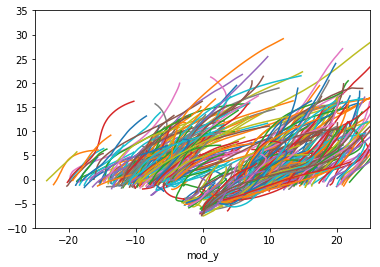

In [517]:
plot_routes(18)

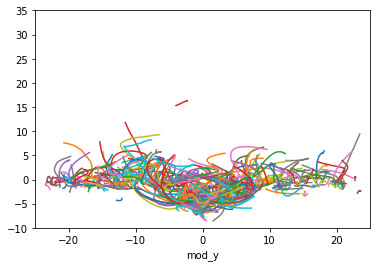

In [518]:
plot_routes(19)

In [270]:
yd_preds = pd.read_csv('pred_max_yds')#.set_index(['gameId', 'playId', 'nflId'])

In [271]:
merged_preds = merged_preds.merge(yd_preds, how='left')

In [272]:
games_played = all_routes_df.groupby('nflId')['gameId'].nunique().to_frame('games_played')

In [273]:
yds_sum = merged_preds[merged_preds['is_target']].groupby(['FirstName', 'LastName','nflId', 'pred'])['own_yds'].sum().to_frame('yds_sum')
yds_sum = yds_sum.join(games_played)
yds_sum['yds_sum'] = yds_sum['yds_sum'] / yds_sum['games_played']
yds_sum = yds_sum.drop('games_played', 1)
yds_sum['yds_sum_rank'] = yds_sum['yds_sum'].rank(ascending=False)

In [274]:
yds_median = merged_preds[merged_preds['is_target']].groupby(['FirstName', 'LastName','nflId', 'pred'])['own_yds'].median().to_frame('yds_median')
yds_median['yds_median_rank'] = yds_median['yds_median'].rank(ascending=False)

In [275]:
pred_yds_median = merged_preds[merged_preds['is_target']].groupby(['FirstName', 'LastName','nflId', 'pred'])['pred_yds'].median().to_frame('pred_yds_median')
pred_yds_median['pred_yds_median_rank'] = pred_yds_median['pred_yds_median'].rank(ascending=False)

In [276]:
targets = merged_preds[merged_preds['is_target']].groupby(['FirstName', 'LastName','nflId', 'pred']).size().to_frame('targets')
targets = targets.join(games_played)
targets['targets'] = targets['targets'] / targets['games_played']
targets = targets.drop('games_played', 1)
targets['targets_rank'] = targets['targets'].rank(ascending=False)

In [277]:
completions = merged_preds[merged_preds['is_target']].groupby(['FirstName', 'LastName','nflId', 'pred'])['own_complete'].sum().to_frame('completions')
completions = completions.join(games_played)
completions['completions'] = completions['completions'] / completions['games_played']
completions = completions.drop('games_played', 1)
completions['completions_rank'] = completions['completions'].rank(ascending=False)

In [278]:
completion_pct = merged_preds[merged_preds['is_target']].groupby(['FirstName', 'LastName','nflId', 'pred'])['own_complete'].mean().to_frame('completion_pct')
completion_pct['completion_pct_rank'] = completion_pct['completion_pct'].rank(ascending=False)

In [279]:
runs = merged_preds.groupby(['FirstName', 'LastName','nflId', 'pred']).size().to_frame('runs')
runs = runs.join(games_played)
runs['runs'] = runs['runs'] / runs['games_played']
runs = runs.drop('games_played', 1)
runs['runs_rank'] = runs['runs'].rank(ascending=False)

In [280]:
(
    yds_sum.join(targets).join(yds_median).join(pred_yds_median).join(completion_pct).join(runs).join(completions)
    .assign(rank = lambda x: x['yds_sum_rank'] +x['completions_rank']).sort_values('rank')
)

,,,,yds_sum,yds_sum_rank,targets,targets_rank,yds_median,yds_median_rank,pred_yds_median,pred_yds_median_rank,completion_pct,completion_pct_rank,runs,runs_rank,completions,completions_rank,rank
FirstName,LastName,nflId,pred,,,,,,,,,,,,,,,
Antonio,Brown,2508061.0,0,44.500000,1.0,3.333333,1.0,10.0,377.5,9.835487,405.0,0.800000,845.5,7.333333,69.0,2.666667,2.5,3.5
Sterling,Shepard,2555295.0,0,43.400000,2.0,2.600000,11.0,11.0,308.5,9.336392,456.0,1.000000,379.0,7.000000,83.5,2.600000,4.0,6.0
Adriel,Green,2495450.0,0,40.600000,3.0,2.600000,11.0,13.0,204.0,9.785822,409.0,0.846154,798.5,5.000000,243.0,2.200000,7.0,10.0
David,Johnson,2553435.0,3,32.000000,11.0,3.000000,4.5,8.0,545.0,4.663067,1047.0,0.666667,994.0,14.000000,3.0,2.000000,12.0,23.0
Robert,Gronkowski,497240.0,0,31.800000,12.0,2.600000,11.0,14.0,172.5,9.481677,438.0,0.769231,870.5,5.400000,197.0,2.000000,12.0,24.0
Keenan,Allen,2540154.0,0,28.666667,18.0,3.166667,3.0,9.0,454.5,10.574462,347.0,0.684211,951.0,8.833333,40.5,2.166667,8.0,26.0
Travis,Kelce,2540258.0,2,34.166667,8.0,2.000000,45.0,10.5,342.0,16.219255,57.0,0.916667,758.0,7.000000,83.5,1.833333,18.5,26.5
Jaron,Brown,2541966.0,2,32.500000,10.0,2.833333,6.0,11.0,308.5,12.961886,179.0,0.647059,1037.0,12.666667,6.5,1.833333,18.5,28.5
Stefon,Diggs,2552608.0,3,39.600000,6.0,1.800000,68.5,21.0,61.0,14.512160,117.0,1.000000,379.0,5.400000,197.0,1.800000,23.5,29.5


In [215]:
route_preds_df = preds_df.merge(players_df[['nflId','FirstName', 'LastName']]).groupby(['FirstName', 'LastName'])['pred_area'].value_counts().unstack()[lambda x: x.sum(axis=1)>50].apply(lambda x: x/x.sum(), 1).fillna(0)

In [235]:
km2 = KMeans(n_clusters=8)
player_clusters=pd.Series(km2.fit_predict(route_preds_df), index=route_preds_df.index)

In [236]:
pc = player_clusters.to_frame('cluster').join(preds_df.merge(players_df[['nflId','FirstName', 'LastName']]).groupby(['FirstName', 'LastName']).size().to_frame('n'))


In [367]:
players_df[players_df['nflId'] == 234]

,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College,one_abbrv,two_abbrv
471,234,Matthew,Forte,RB,2008,2.0,44.0,"6'02""",218,Tulane,M.Forte,Ma.Forte


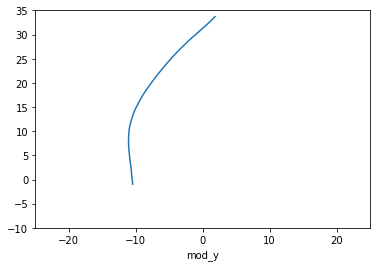

In [492]:
d_ = finished_tracking[
    (finished_tracking['gameId'] == 2017090700) & 
    (finished_tracking['playId'] == 68) & 
    (finished_tracking['nflId'] == 2530515.0)
].sort_values('frame.id')
d_.set_index('mod_y')['mod_x'].plot(xlim=[-25, 25], ylim=[-10, 35])

In [142]:
preds_df.groupby(['gameId', 'playId']).size().shape

(4906,)

In [143]:
passes_df.shape

(6958, 31)

In [144]:
all_routes_df.groupby(['gameId', 'playId']).size().shape

(4906,)

In [297]:
joined = passes_df.set_index(['gameId', 'playId']).join(preds_df.groupby(['gameId', 'playId']).apply(lambda x: x['pred_area'].values).to_frame('preds')).dropna(subset=['preds'])

In [298]:
joined['2_preds'] = [list(itertools.combinations(sorted(x), 2)) for x in joined['preds']]

In [299]:
joined = joined.join(pd.get_dummies(joined['preds'].apply(pd.Series).stack()).groupby(level=[0,1]).sum())
joined = joined.join(pd.get_dummies(joined['2_preds'].apply(pd.Series).stack()).groupby(level=[0,1]).sum())

In [300]:
joined.columns[31:]

Index([         '0_C',          '0_L',          '0_R',          '1_C',
                '1_L',          '1_R',          '2_C',          '2_L',
                '2_R',          '3_C',
       ...
       ('6_R', '6_R'), ('6_R', '7_C'), ('6_R', '7_L'), ('6_R', '7_R'),
       ('7_C', '7_C'), ('7_C', '7_L'), ('7_C', '7_R'), ('7_L', '7_L'),
       ('7_L', '7_R'), ('7_R', '7_R')],
      dtype='object', length=313)

In [301]:
x_df = pd.get_dummies(joined['possessionTeam']).join(joined[joined.columns[31:]])
y_df = joined['PlayResult']

In [302]:
from sklearn.linear_model import RidgeCV,LassoCV

In [303]:
mod = RidgeCV(alphas=[1,10,100,1000, 10000])
mod.fit(x_df, y_df)

RidgeCV(alphas=array([    1,    10,   100,  1000, 10000]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [304]:
pd.Series(mod.coef_, x_df.columns).sort_values()

BAL          -0.354830
(0_L, 2_R)   -0.331793
(2_L, 3_R)   -0.321094
3_L          -0.311442
MIA          -0.305075
0_L          -0.304347
(0_L, 3_L)   -0.300267
(0_R, 3_L)   -0.288386
(1_R, 7_L)   -0.282271
0_R          -0.280859
(0_L, 7_R)   -0.273699
(5_L, 5_R)   -0.256352
(0_R, 4_L)   -0.256244
(2_R, 2_R)   -0.246953
(1_R, 4_L)   -0.237633
(0_R, 1_L)   -0.234572
(3_R, 7_L)   -0.219025
(1_L, 4_R)   -0.213904
(6_L, 6_R)   -0.206272
CHI          -0.199998
(5_L, 6_R)   -0.194879
CLE          -0.192580
(1_R, 1_R)   -0.189018
(3_C, 7_R)   -0.186773
SF           -0.173661
(1_L, 7_L)   -0.173129
NYG          -0.168812
2_R          -0.167616
BUF          -0.165251
(0_L, 0_R)   -0.162960
                ...   
(1_L, 6_R)    0.145546
(0_L, 2_L)    0.148064
(5_C, 5_R)    0.151980
(4_L, 7_R)    0.152866
TB            0.159834
(0_C, 1_L)    0.163387
(0_C, 2_R)    0.177351
2_C           0.181979
(5_C, 6_L)    0.187716
(4_R, 5_C)    0.188012
(2_L, 5_C)    0.191657
6_L           0.194451
0_C        

In [308]:
import sys
sys.path.insert(0,'/Users/harrisonchase/workplace/sports/for_harrison/')

In [310]:
all_routes_df[['gameId', 'playId', 'nflId', 'mod_x', 'mod_mod_y']]

,gameId,playId,nflId,mod_x,mod_mod_y
0,2017090700,68,497240.0,-0.99,4.99
1,2017090700,68,497240.0,-0.98,4.98
2,2017090700,68,497240.0,-0.98,4.98
3,2017090700,68,497240.0,-0.96,4.96
4,2017090700,68,497240.0,-0.85,4.87
5,2017090700,68,497240.0,-0.54,4.61
6,2017090700,68,497240.0,-0.16,4.28
7,2017090700,68,497240.0,0.19,3.98
8,2017090700,68,497240.0,0.49,3.68
9,2017090700,68,497240.0,0.83,3.37
